## Initial EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
sns.set_style("dark")
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
import pickle
import re

In [50]:
df = pd.read_csv('./data/train.csv')
df = df.set_index('Id')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [37]:
#check column heads
#df.columns

In [4]:
df.columns = list(map(lambda x: '_' + x if re.match('^\d', x) else x, df.columns))
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '_1stFlrSF', '_2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', '

In [5]:
#descriptive statistics summary
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(80)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [38]:
ord_df = df.copy()

# Lot shape as int
preserved_mapper_LotShape = {"IR3": 1, "IR2": 2, "IR1": 3, "Reg" : 4}
ord_df['LotShape'] = ord_df.LotShape.replace(preserved_mapper_LotShape)

# Land Slope as int
preserved_mapper_LandSlope = {"Sev": 1, "Mod": 2, "Gtl" : 3}
ord_df['LandSlope'] = ord_df.LandSlope.replace(preserved_mapper_LandSlope)

# Overall quality as int

# Overall condition seems like a nonlinear indicator with a huge range of values at 5! CONSIDER DROPPING IT

# External quality as int
preserved_mapper_ExterQual = {"Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['ExterQual'] = ord_df.ExterQual.replace(preserved_mapper_ExterQual)

# External condition seems like a nonlinear indicator with a huge range of values at 5! CONSIDER DROPPING IT
preserved_mapper_ExterCond = {"Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['ExterCond'] = ord_df.ExterCond.replace(preserved_mapper_ExterCond)

# Basement quality
preserved_mapper_BsmtQual = {"nan": 0, "Po": 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['BsmtQual'] = ord_df.BsmtQual.replace(preserved_mapper_BsmtQual)

# Basement condition seems like a nonlinear indicator with a huge range of values at 5! CONSIDER ONE HOT
preserved_mapper_BsmtCond = {"nan": 0, "Po": 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['BsmtCond'] = ord_df.BsmtCond.replace(preserved_mapper_BsmtCond)

# Basement exposure
preserved_mapper_BsmtExposure = {"nan" : 0, "No": 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
ord_df['BsmtExposure'] = ord_df.BsmtExposure.replace(preserved_mapper_BsmtExposure)

# Heating QC as int
preserved_mapper_HeatingQC = {"Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['HeatingQC'] = ord_df.HeatingQC.replace(preserved_mapper_HeatingQC)

# Kitchen quality as int
preserved_mapper_KitchenQual = {"Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['KitchenQual'] = ord_df.KitchenQual.replace(preserved_mapper_KitchenQual)

# Fireplace quality isn't well represented as linear. CONSIDER ONE HOT
preserved_mapper_FireplaceQu = {"nan": 0, "Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['FireplaceQu'] = ord_df.FireplaceQu.replace(preserved_mapper_FireplaceQu)

# Functional as int
preserved_mapper_Functional = {"Sal": 0, "Sev" : 1, "Maj2": 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7}
ord_df['Functional'] = ord_df.Functional.replace(preserved_mapper_Functional)

# GarageQual as int
preserved_mapper_GarageQual = {"nan": 0, "Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['GarageQual'] = ord_df.GarageQual.replace(preserved_mapper_GarageQual)

# GarageCond as int
preserved_mapper_GarageCond = {"nan": 0, "Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['GarageCond'] = ord_df.GarageCond.replace(preserved_mapper_GarageCond)

# PoolQC as int
preserved_mapper_PoolQC = {"nan": 0, "Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
ord_df['PoolQC'] = ord_df.PoolQC.replace(preserved_mapper_PoolQC)

# BsmtFinType1 as int
preserved_mapper_BsmtFinType1 = {"NA": 0, "Unf": 1, "LwQ": 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, "GLQ": 6}
ord_df['BsmtFinType1'] = ord_df.BsmtFinType1.replace(preserved_mapper_BsmtFinType1)

# BsmtFinType2 as int
preserved_mapper_BsmtFinType2 = {"NA": 0, "Unf": 1, "LwQ": 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, "GLQ": 6}
ord_df['BsmtFinType2'] = ord_df.BsmtFinType2.replace(preserved_mapper_BsmtFinType2)

# GarageFinish as int
preserved_mapper_GarageFinish = {"NA": 0, "Unf" : 1, "RFn": 2, 'Fin': 3}
ord_df['GarageFinish'] = ord_df.GarageFinish.replace(preserved_mapper_GarageFinish)

# PavedDrive as int
preserved_mapper_PavedDrive = {"N": 0, "P" : 1, "Y": 2}
ord_df['PavedDrive'] = ord_df.PavedDrive.replace(preserved_mapper_PavedDrive)
ord_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,_1stFlrSF,_2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,_3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,4,Lvl,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4.0,3.0,1.0,6.0,706,1.0,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,7,0,NaN,Attchd,2003.0,2.0,2,548,3.0,3.0,2,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,4,Lvl,FR2,3,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4.0,3.0,4.0,5.0,978,1.0,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,3.0,Attchd,1976.0,2.0,2,460,3.0,3.0,2,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,3,Lvl,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4.0,3.0,2.0,6.0,486,1.0,0,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,7,1,3.0,Attchd,2001.0,2.0,2,608,3.0,3.0,2,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,3,Lvl,Corner,3,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3.0,4.0,1.0,5.0,216,1.0,0,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,7,1,4.0,Detchd,1998.0,1.0,3,642,3.0,3.0,2,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,3,Lvl,FR2,3,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4.0,3.0,3.0,6.0,655,1.0,0,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,7,1,3.0,Attchd,2000.0,2.0,3,836,3.0,3.0,2,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,3,Lvl,Inside,3,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,Wood,4.0,3.0,1.0,6.0,732,1.0,0,64,796,GasA,5,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,3,5,7,0,NaN,Attchd,1993.0,1.0,2,480,3.0,3.0,2,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,4,Lvl,Inside,3,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,4,3,PConc,5.0,3.0,3.0,6.0,1369,1.0,0,317,1686,GasA,5,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,4,7,7,1,4.0,Attchd,2004.0,2.0,2,636,3.0,3.0,2,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,3,Lvl,Corner,3,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,3,3,CBlock,4.0,3.0,2.0,5.0,859,4.0,32,216,1107,GasA,5,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,3,7,7,2,3.0,Attchd,1973.0,2.0,2,484,3.0,3.0,2,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,4,Lvl,Inside,3,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,3,3,BrkTil,3.0,3.0,1.0,1.0,0,1.0,0,952,952,GasA,4,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,3,8,6,2,3.0,Detchd,1931.0,1.0,2,468,2.0,3.0,2,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [39]:
for col in ord_df.columns:
    if ord_df[col].dtype == 'float64':
        ord_df[col] = ord_df[col].apply(lambda x: 0 if pd.isnull(x) else x)
        ord_df[col] = ord_df[col].apply(int)

In [40]:
ord_list = ['LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'Functional', 'GarageQual', 'GarageCond', 'PoolQC', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish', 'PavedDrive']
ord_df[ord_list].isnull().any()

LotShape        False
LandSlope       False
OverallQual     False
OverallCond     False
ExterQual       False
ExterCond       False
BsmtQual        False
BsmtCond        False
BsmtExposure    False
HeatingQC       False
KitchenQual     False
FireplaceQu     False
Functional      False
GarageQual      False
GarageCond      False
PoolQC          False
BsmtFinType1    False
BsmtFinType2    False
GarageFinish    False
PavedDrive      False
dtype: bool

In [43]:
ord_df.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,_1stFlrSF,_2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,_3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,NaN,4,Lvl,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,4,3,PConc,4,3,1,6,706,1,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,7,0,0,Attchd,2003,2,2,548,3,3,2,0,61,0,0,0,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NaN,4,Lvl,FR2,3,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,3,Attchd,1976,2,2,460,3,3,2,298,0,0,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NaN,3,Lvl,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,4,3,PConc,4,3,2,6,486,1,0,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,7,1,3,Attchd,2001,2,2,608,3,3,2,0,42,0,0,0,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NaN,3,Lvl,Corner,3,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,7,1,4,Detchd,1998,1,3,642,3,3,2,0,35,272,0,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NaN,3,Lvl,FR2,3,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,4,3,PConc,4,3,3,6,655,1,0,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,7,1,3,Attchd,2000,2,3,836,3,3,2,192,84,0,0,0,0,0,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NaN,3,Lvl,Inside,3,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,3,3,Wood,4,3,1,6,732,1,0,64,796,GasA,5,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,3,5,7,0,0,Attchd,1993,1,2,480,3,3,2,40,30,0,320,0,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75,10084,Pave,NaN,4,Lvl,Inside,3,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186,4,3,PConc,5,3,3,6,1369,1,0,317,1686,GasA,5,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,4,7,7,1,4,Attchd,2004,2,2,636,3,3,2,255,57,0,0,0,0,0,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,0,10382,Pave,NaN,3,Lvl,Corner,3,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240,3,3,CBlock,4,3,2,5,859,4,32,216,1107,GasA,5,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,3,7,7,2,3,Attchd,1973,2,2,484,3,3,2,235,204,228,0,0,0,0,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51,6120,Pave,NaN,4,Lvl,Inside,3,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0,3,3,BrkTil,3,3,1,1,0,1,0,952,952,GasA,4,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,3,8,6,2,3,Detchd,1931,1,2,468,2,3,2,90,0,205,0,0,0,0,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [44]:
preserved_mapper_MoSold = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
ord_df['MoSold'] = ord_df.MoSold.replace(preserved_mapper_MoSold)

In [46]:
transformed = ord_df.copy()
X = pd.get_dummies(transformed.iloc[:, transformed.columns != 'SalePrice'], drop_first=True, dummy_na=True)
y = transformed.SalePrice
X

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,_1stFlrSF,_2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_nan,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,MoSold_nan,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65,8450,4,3,7,5,2003,2003,196,4,3,4,3,1,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,7,0,0,2003,2,2,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,20,80,9600,4,3,6,8,1976,1976,0,3,3,4,3,4,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,3,1976,2,2,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,60,68,11250,3,3,7,5,2001,2002,162,4,3,4,3,2,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,7,1,3,2001,2,2,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,70,60,9550,3,3,7,5,1915,1970,0,3,3,3,4,1,5,216,1,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,7,1,4,1998,1,3,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,60,84,14260,3,3,8,5,2000,2000,350,4,3,4,3,3,6,655,1,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,7,1,3,2000,2,3,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
6,50,85,14115,3,3,5,5,1993,1995,0,3,3,4,3,1,6,732,1,0,64,796,5,796,566,0,1362,1,0,1,1,1,1,3,5,7,0,0,1993,1,2,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
7,20,75,10084,4,3,8,5,2004,2005,186,4,3,5,3,3,6,1369,1,0,317,1686,5,1694,0,0,1694,1,0,2,0,3,1,4,7,7,1,4,2004,2,2,...,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
8,60,0,10382,3,3,7,6,1973,1973,240,3,3,4,3,2,5,859,4,32,216,1107,5,1107,983,0,2090,1,0,2,1,3,1,3,7,7,2,3,1973,2,2,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
9,50,51,6120,4,3,7,5,1931,1950,0,3,3,3,3,1,1,0,1,0,952,952,4,1022,752,0,1774,0,0,2,0,2,2,3,8,6,2,3,1931,1,2,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [47]:
X.to_csv('./data/transformed_train.csv')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


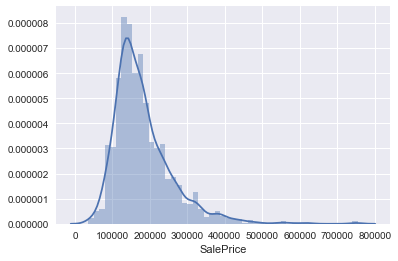

In [26]:
#histogram
sns.distplot(df['SalePrice']);

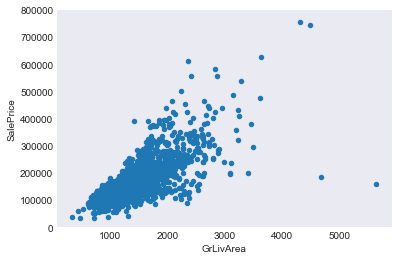

In [13]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

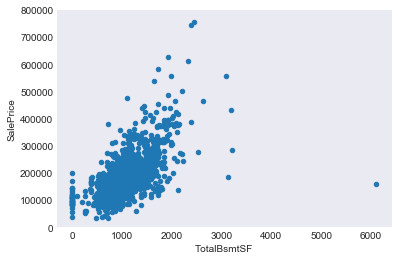

In [15]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

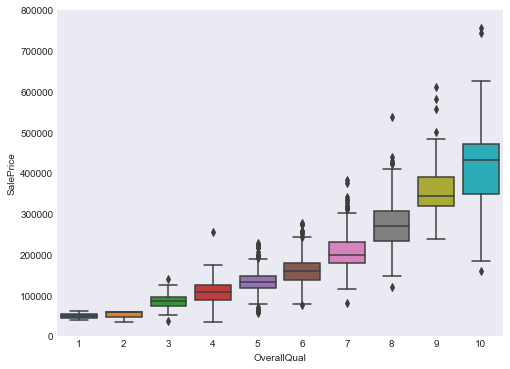

In [17]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

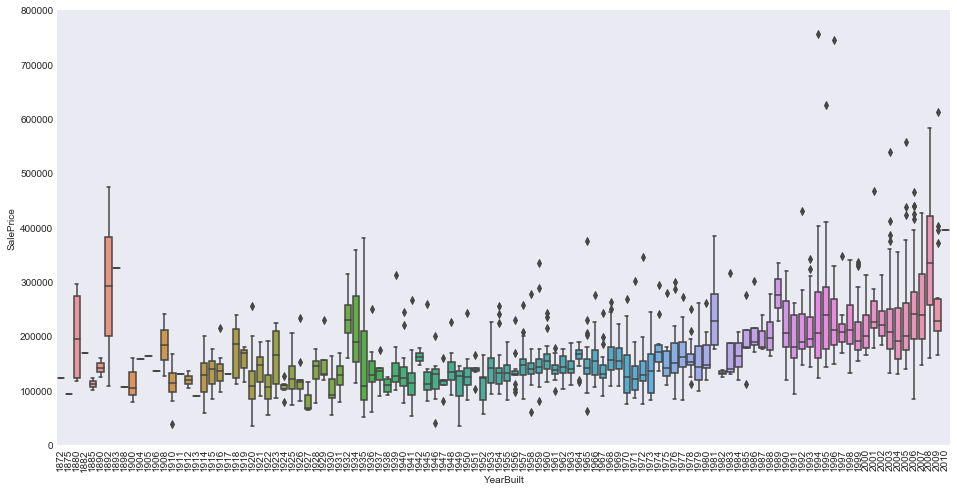

In [19]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

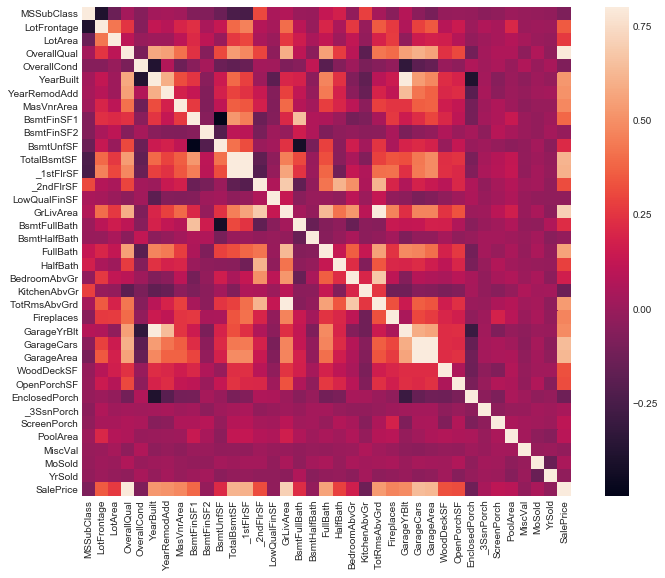

In [20]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

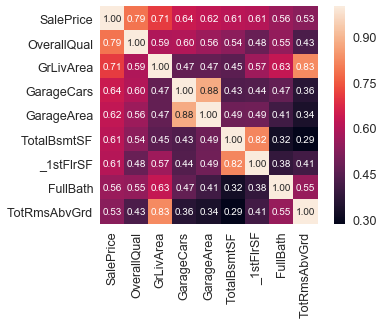

In [23]:
#saleprice correlation matrix
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

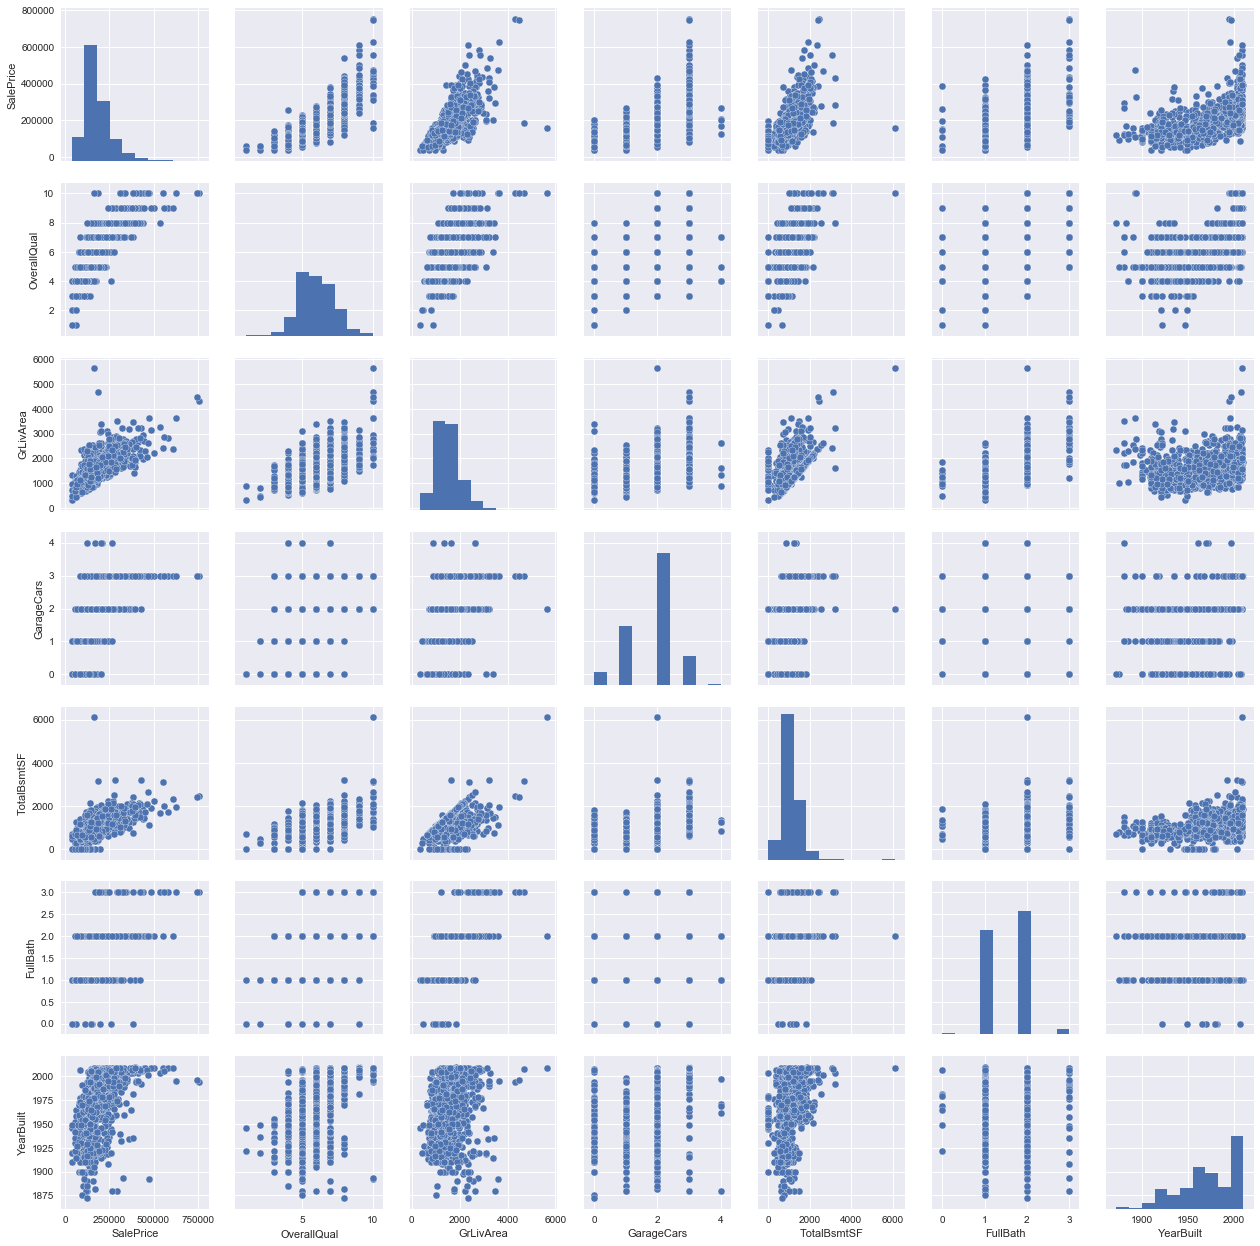

In [25]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();